# Pandas

In [39]:
# преобразование таблиц с данными по ковиду в одну

import pandas as pd

covid_data = pd.read_csv('data/covid_data.csv')
vaccinations_data = pd.read_csv('data/country_vaccinations.csv')

covid_data = covid_data.groupby( # выкинули информацию по штатами и сгруппировали по странам
    ['date', 'country'], 
    as_index=False
)[['confirmed', 'deaths', 'recovered']].sum()

covid_data['date'] = pd.to_datetime(covid_data['date'])

covid_data['active'] = covid_data['confirmed'] - covid_data['deaths'] - covid_data['recovered']

covid_data = covid_data.sort_values(by=['country', 'date'])
covid_data['daily_confirmed'] = covid_data.groupby('country')['confirmed'].diff() # разница между двумя соседними значениями в строках
covid_data['daily_deaths'] = covid_data.groupby('country')['deaths'].diff()
covid_data['daily_recovered'] = covid_data.groupby('country')['recovered'].diff()


vaccinations_data['date'] = pd.to_datetime(vaccinations_data['date'])

#display(covid_data.head())
#display(vaccinations_data.head())

 covid_df = covid_data.merge(
    vaccinations_data,
    on=['date','country'],
    how='left'
)
 
 covid_df['death_rate'] = covid_df['deaths'] / covid_df['confirmed'] * 100
 covid_df['recover_rate'] = covid_df['recovered'] / covid_df['confirmed'] * 100
 display(covid_df.head())
 
 #covid_df.to_csv('data/covid_df.csv', index=False, sep=';')

,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered
11337,2020-02-24,Afghanistan,1.0,0.0,0.0,1.0,NaN,NaN,NaN
11570,2020-02-25,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
11807,2020-02-26,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
12051,2020-02-27,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
12299,2020-02-28,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0


,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://app.powerbi.com/view?r=eyJrIjoiYTkyM2V...
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://app.powerbi.com/view?r=eyJrIjoiYTkyM2V...
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://app.powerbi.com/view?r=eyJrIjoiYTkyM2V...
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://app.powerbi.com/view?r=eyJrIjoiYTkyM2V...
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://app.powerbi.com/view?r=eyJrIjoiYTkyM2V...


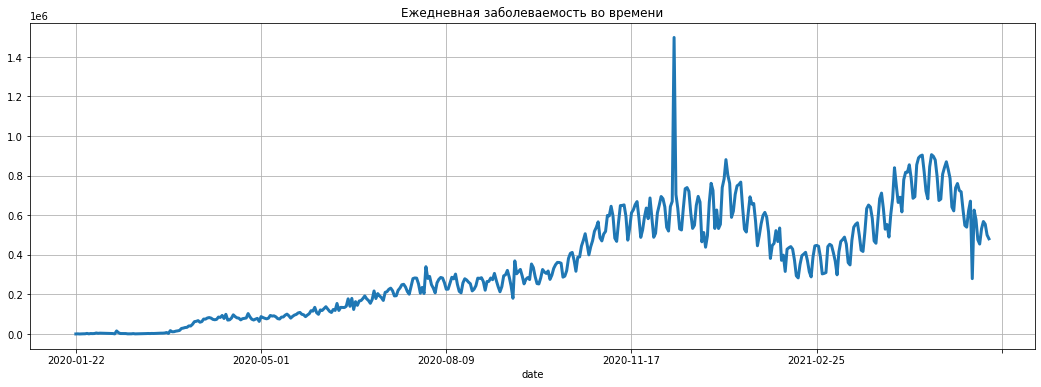

In [87]:
# линейная диаграмма

import pandas as pd

#covid_df = pd.read_csv('data/covid_df.csv',sep=';')

grouped_cases = covid_df.groupby('date')['daily_confirmed'].sum() # объект типа Series
grouped_cases.plot( # не указываем х и у, т.к. ими выступают значения и индексы Series
    kind='line', # тип графика
    figsize=(18, 6), # размер
    title='Ежедневная заболеваемость во времени', # название графика
    grid = True, # отображение сетки
    lw=3 # толщина линии
); # ; чтобы не выводить служебную информацию

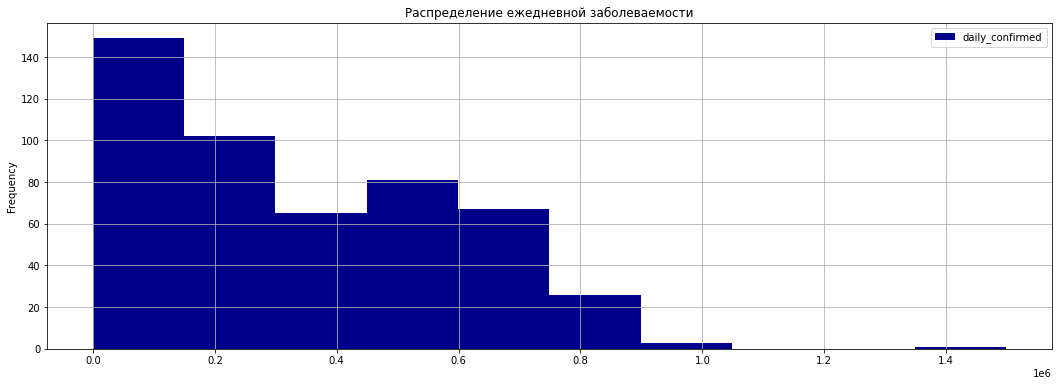

In [99]:
# гистограмма

grouped_cases.plot(
    kind='hist', # гистограмма
    figsize=(18, 6),
    title='Распределение ежедневной заболеваемости',
    grid = True,
    color = 'darkblue',
    bins=10, # число прямоугольников
    legend = True
);

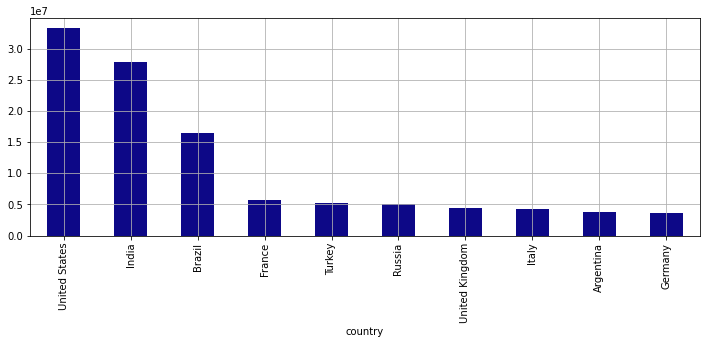

In [107]:
# столбчатая диаграмма

grouped_country = covid_df.groupby(['country'])['confirmed'].last() # последний зафиксированный показатель
grouped_country = grouped_country.nlargest(10)
grouped_country.plot(
    kind='bar', 
    grid=True,
    figsize=(12, 4),
    colormap='plasma'
);

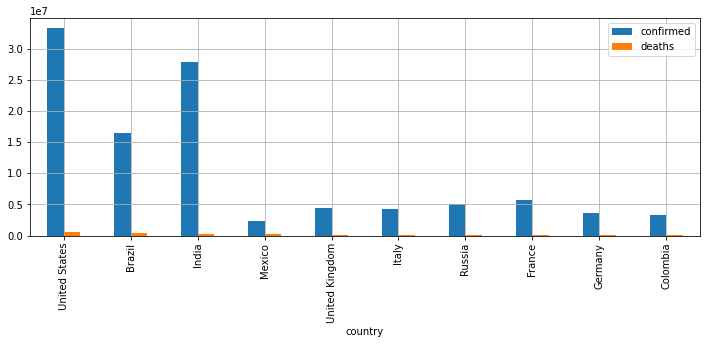

In [109]:
# столбчатая диаграмма с двумя показателями

grouped_country = covid_df.groupby(['country'])[['confirmed', 'deaths']].last()
grouped_country = grouped_country.nlargest(10, columns=['deaths'])
grouped_country.plot( 
    kind='bar', 
    grid=True, 
    figsize=(12, 4), 
);

# Matplotlib

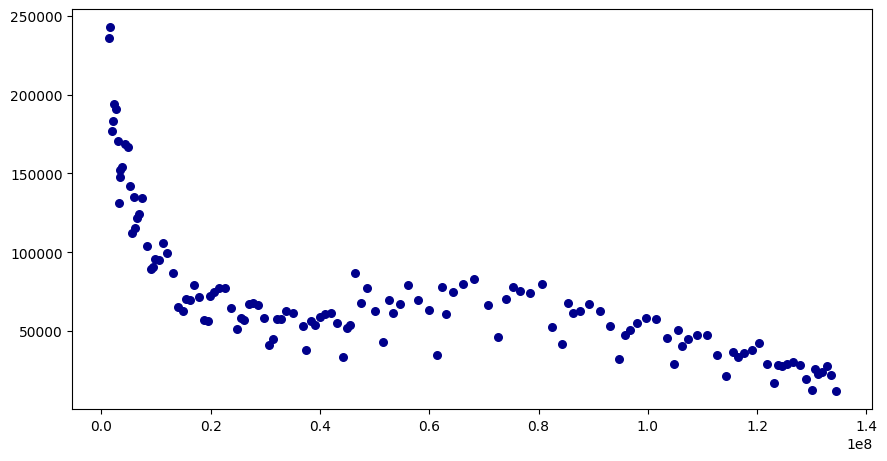

In [127]:
# диаграмма рассеивания

import matplotlib.pyplot as plt
# для корректного отображения графиков в ноутбуках 
%matplotlib inline 
plt.style.use('default') # для корректного отображения графиков на тёмном фоне

us_data = covid_df[covid_df['country'] == 'United States']

fig = plt.figure(figsize=(8, 4)) # размер фигуры
axes = fig.add_axes([0, 0, 1, 1]) # координаты начала осей
axes.scatter(
    x=us_data['people_fully_vaccinated'], 
    y=us_data['daily_confirmed'], 
    s=30, # размер маркеров
    marker='o', # вид маркеров ('o' — точки, '^' — треугольники);
    c = 'darkblue'
);

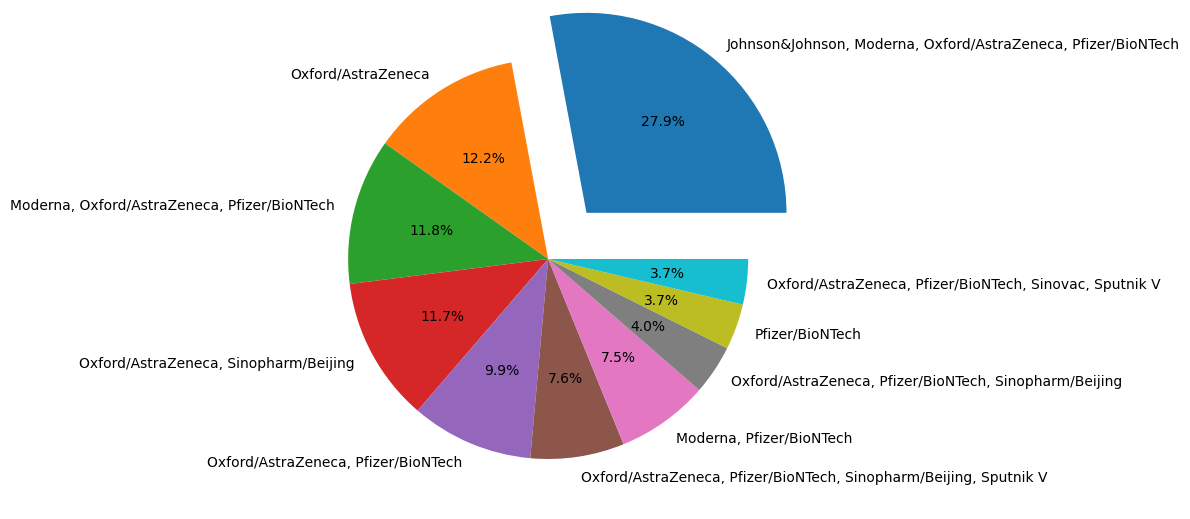

In [132]:
# круговая диаграмма

vaccine_combinations = covid_df['vaccines'].value_counts()[:10]
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    vaccine_combinations,
    labels=vaccine_combinations.index, # подписи
    autopct='%.1f%%', # формат отображения долей на диаграмме
    explode = [0.3, 0, 0, 0, 0, 0, 0, 0, 0, 0] #доля смещения сектора от центра для каждого значения
);

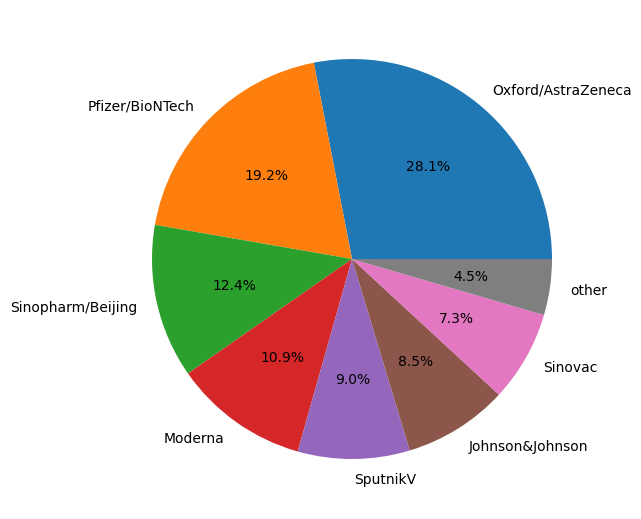

In [133]:
# круговая диаграмма с добавление сектора other 


combination_not_nan = covid_df.dropna(subset=['vaccines']) #избавляемся от пропусков в столбце с вакцинами
combination_last = combination_not_nan.groupby(['country'])['vaccines'].last() #группируем по странам и выбираем последнюю комбинацию вакцин в стране
combination_last = combination_last.apply(lambda x: x.replace(' ', '').split(',')) #заменяем пробелы в строках и делим комбинации на отдельные вакцины по запятой
vaccines_dict = {} 

for vaccines_list in combination_last: #создаём цикл по элементам Series combination_last
    for vaccine in vaccines_list: #создаём цикл по элементам списка с вакцинами
        #проверяем условие, что текущей вакцины ещё нет среди ключей словаря
        if vaccine not in vaccines_dict:#если условие выполняется
            vaccines_dict[vaccine] = 1 #заносим вакцину в словарь со значением 1
        else: #в противном случае
            vaccines_dict[vaccine] += 1 #увеличивает количество

vaccines = pd.Series(vaccines_dict).sort_values(ascending=False) #преобразуем словарь в Series
vaccines['other'] = vaccines[7:].sum() #выделяем ТОП-7 вакцин и добавляем категорию 'other'
vaccines = vaccines.sort_values(ascending=False)[:8]

fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    vaccines,
    labels=vaccines.index,
    autopct='%.1f%%',
);

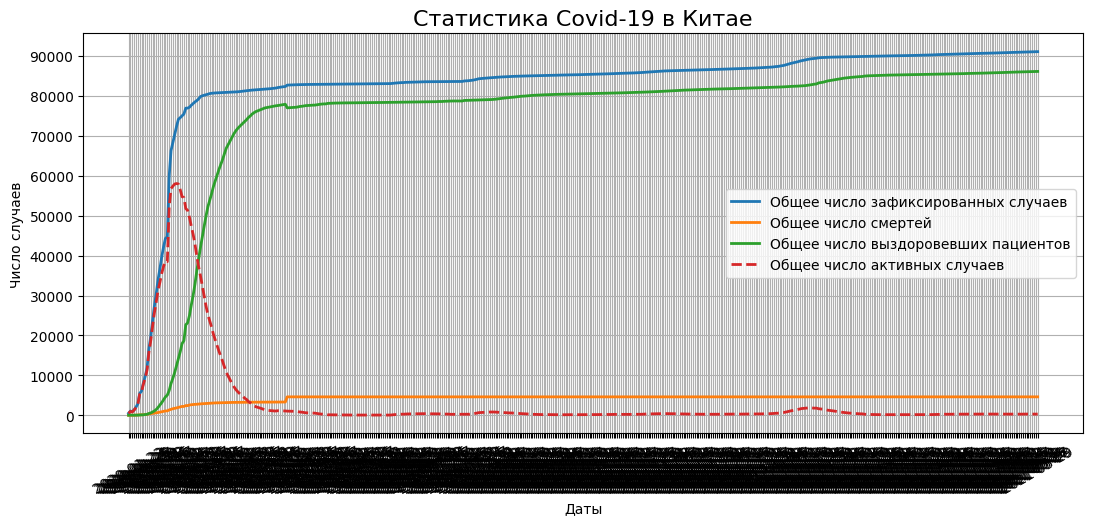

In [142]:
# бьютификация графиков

china_data = covid_df[covid_df['country'] == 'China']
china_grouped = china_data.groupby(['date'])[['confirmed', 'active', 'deaths', 'recovered']].sum()

fig = plt.figure(figsize=(10, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.plot(china_grouped['confirmed'], label='Общее число зафиксированных случаев', lw=2)
axes.plot(china_grouped['deaths'], label='Общее число смертей', lw=2)
axes.plot(china_grouped['recovered'], label='Общее число выздоровевших пациентов', lw=2)
axes.plot(china_grouped['active'], label='Общее число активных случаев', lw=2, linestyle='dashed')

axes.set_title('Статистика Covid-19 в Китае', fontsize=16)
axes.set_xlabel('Даты')
axes.set_ylabel('Число случаев')
axes.set_yticks(range(0, 100000, 10000))
axes.xaxis.set_tick_params(rotation=30)
axes.grid()
axes.legend();

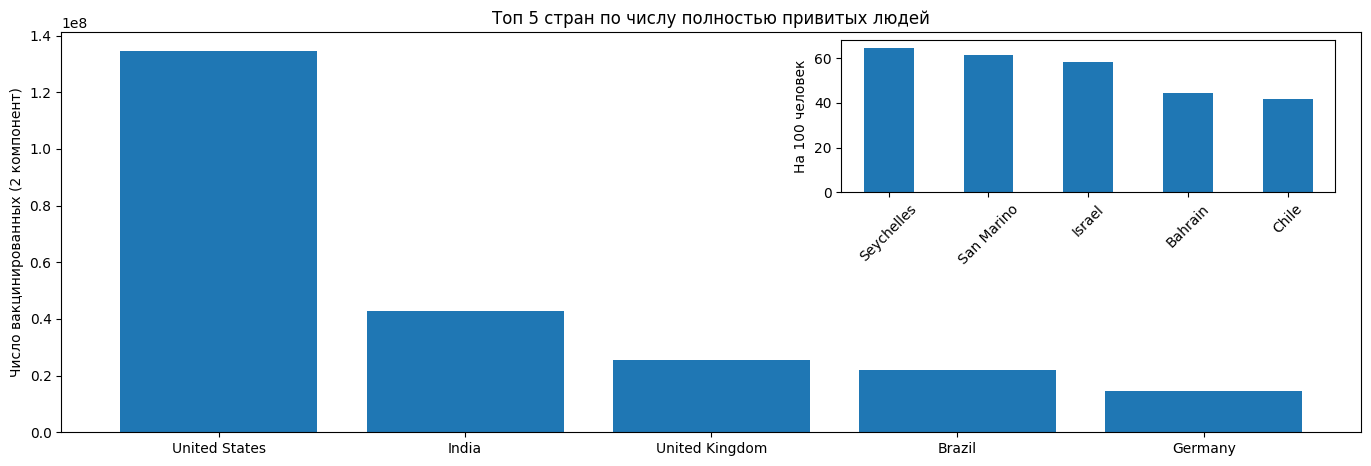

In [143]:
# несколько систем координат

vacc_country = covid_df.groupby('country')['people_fully_vaccinated'].last().nlargest(5)
vacc_country_per_hundred = covid_df.groupby('country')['people_fully_vaccinated_per_hundred'].last().nlargest(5)

#визуализация главного графика
fig = plt.figure(figsize=(13, 4))
main_axes = fig.add_axes([0, 0, 1, 1])
main_axes.bar(x = vacc_country.index, height = vacc_country);
main_axes.set_ylabel('Число вакцинированных (2 компонент)')
main_axes.set_title('Топ 5 стран по числу полностью привитых людей')

#визуализация вспомогательного графика
insert_axes = fig.add_axes([0.6, 0.6, 0.38, 0.38])
insert_axes.bar(x = vacc_country_per_hundred.index, height = vacc_country_per_hundred, width=0.5);
insert_axes.set_ylabel('На 100 человек')
insert_axes.xaxis.set_tick_params(rotation=45)

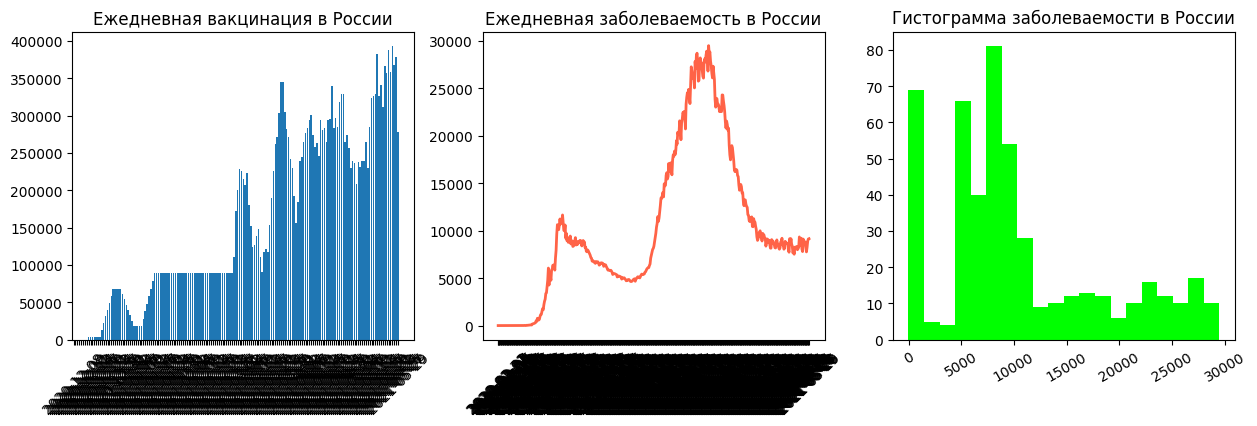

In [145]:
# несколько графиков на одном листе

russia_data = covid_df[covid_df["country"] == "Russia"]

# визуализация систем координат
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

# столбчатая диаграмма
axes[0].bar(
    x=russia_data["date"],
    height=russia_data["daily_vaccinations"],
    label="Число вакцинированных",
)
axes[0].set_title("Ежедневная вакцинация в России")
axes[0].xaxis.set_tick_params(rotation=45)

# линейный график
axes[1].plot(
    russia_data["date"],
    russia_data["daily_confirmed"],
    label="Число заболевших",
    color="tomato",
    lw=2,
)
axes[1].set_title("Ежедневная заболеваемость в России")
axes[1].xaxis.set_tick_params(rotation=45)

# гистограмма
axes[2].hist(
    x=russia_data["daily_confirmed"], label=["Число заболевших"], color="lime", bins=20
)
axes[2].set_title("Гистограмма заболеваемости в России")
axes[2].xaxis.set_tick_params(rotation=30)

# Seaborn

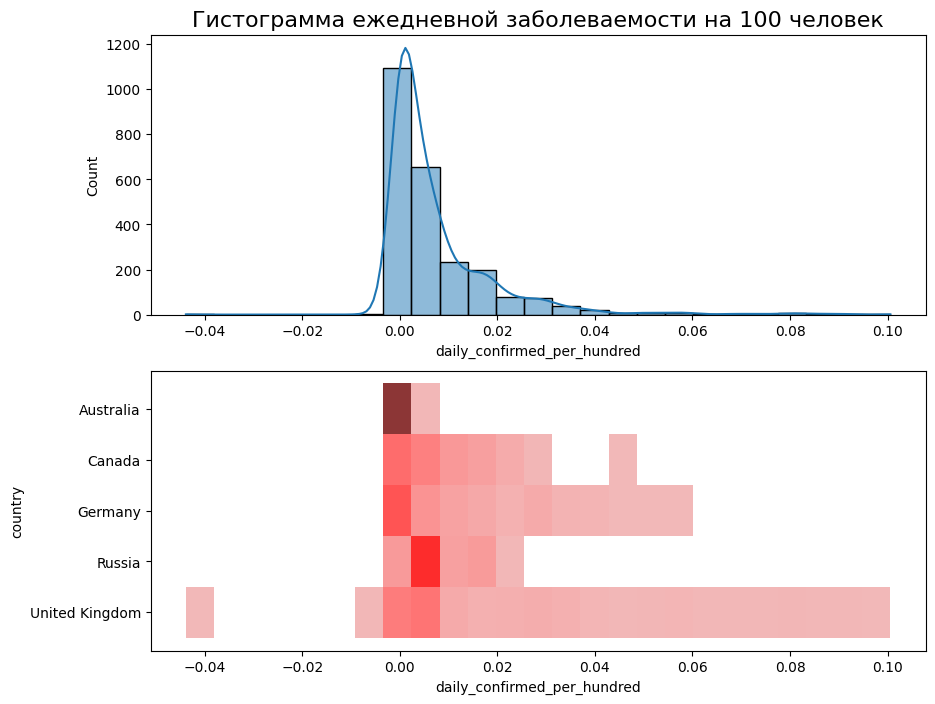

In [165]:
# гистограмма

import seaborn as sns

countries = ['Russia', 'Australia', 'Germany', 'Canada', 'United Kingdom']
croped_covid_df = covid_df[covid_df['country'].isin(countries)] # фильтрация по заданному списку

populations = pd.DataFrame([
    ['Canada', 37664517],
    ['Germany', 83721496],
    ['Russia', 145975300],
    ['Australia', 25726900],
    ['United Kingdom', 67802690]
    ],
    columns=['country', 'population']
)
croped_covid_df = croped_covid_df.merge(populations, on=['country'])
croped_covid_df['daily_confirmed_per_hundred'] = croped_covid_df['daily_confirmed'] / croped_covid_df['population'] * 100

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

sns.histplot(
    data=croped_covid_df,
    x='daily_confirmed_per_hundred',
    bins=25, # количество столбцов
    kde=True, # стоит ли сглаживать гистограмму кривой (по умолчанию False)
    ax=axes[0]
);
axes[0].set_title('Гистограмма ежедневной заболеваемости на 100 человек', fontsize=16)

sns.histplot(
    data=croped_covid_df,
    x='daily_confirmed_per_hundred',
    y='country', # добавляем параметр названия страны по оси y, количество наблюдений будет обозначаться на диаграмме яркостью цвета
    bins=25,
    color='red',
    ax=axes[1]
);

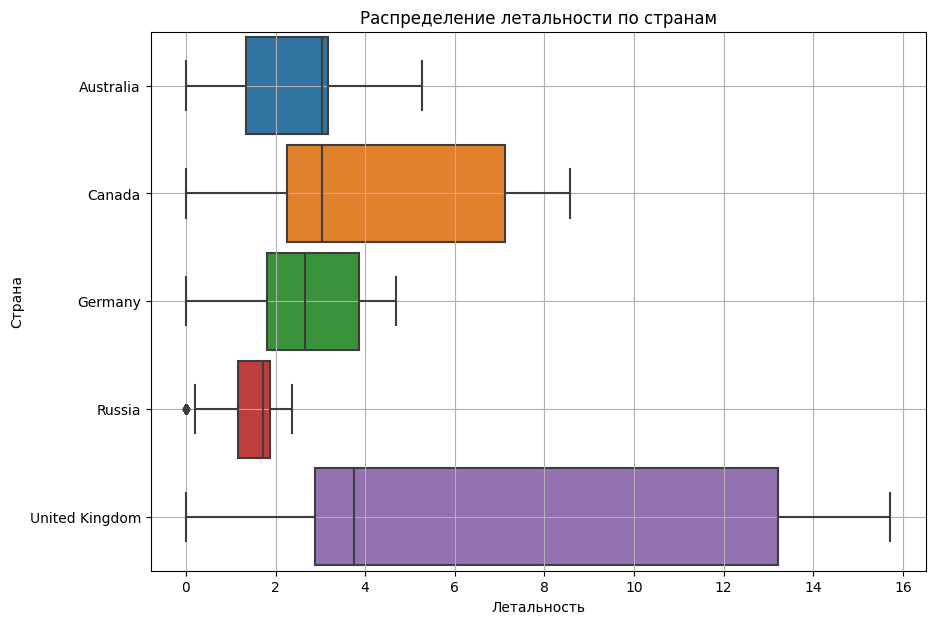

In [149]:
# коробчатая диаграмма

fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=croped_covid_df,
    y='country',
    x='death_rate',
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение летальности по странам');
boxplot.set_xlabel('Летальность');
boxplot.set_ylabel('Страна');
boxplot.grid()

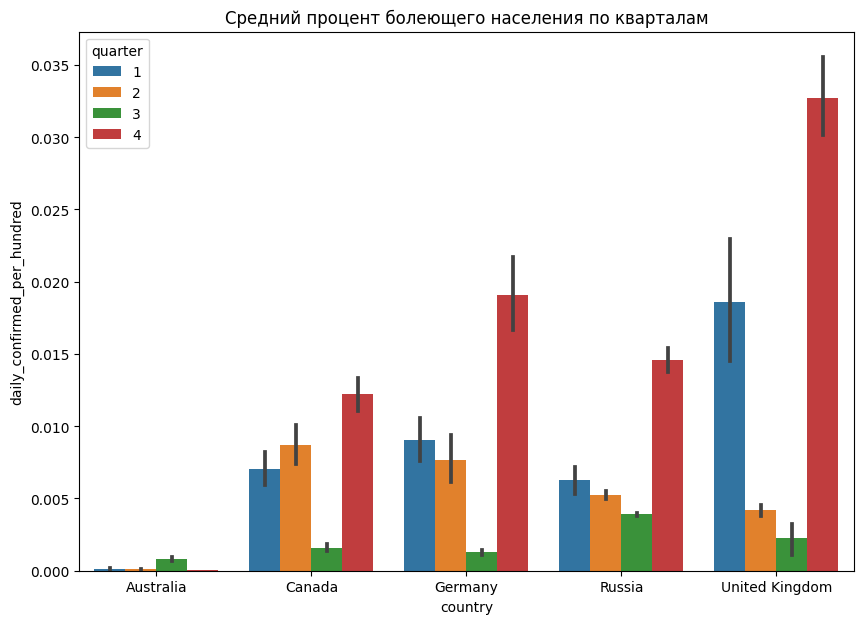

In [169]:
# многоуровневая столбчатая диаграмма

fig = plt.figure(figsize=(10, 7))
croped_covid_df['date'] = pd.to_datetime(croped_covid_df['date'])
croped_covid_df['quarter'] = croped_covid_df['date'].dt.quarter

barplot = sns.barplot(
    data=croped_covid_df,
    x='country',
    y='daily_confirmed_per_hundred',
    hue='quarter', # группировка данных по признаку для многоуровневости
)
barplot.set_title('Средний процент болеющего населения по кварталам');

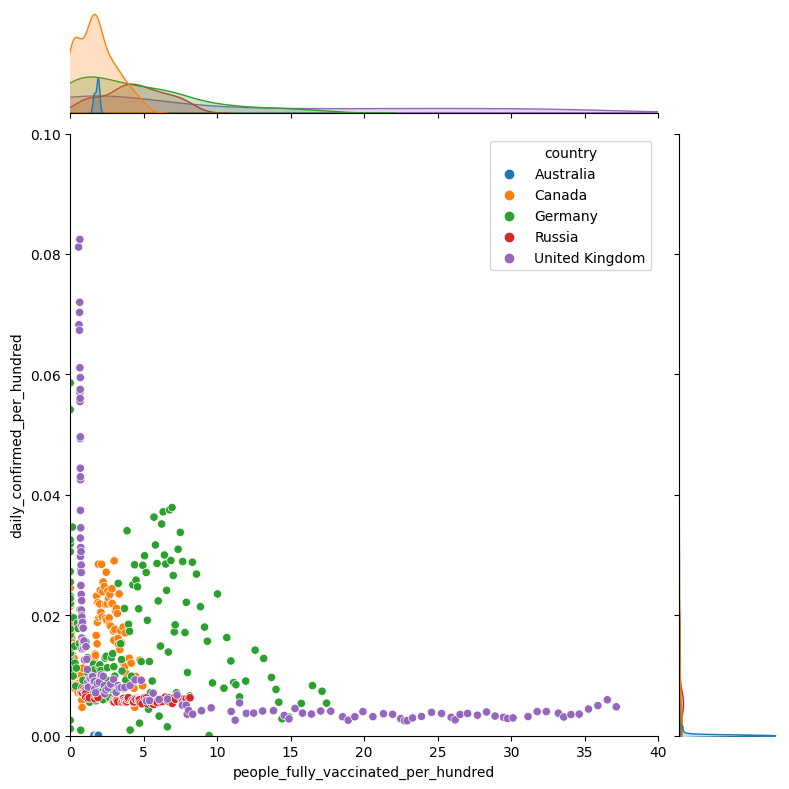

In [170]:
# Jointplot (рассеяние + гистограмма)

jointplot = sns.jointplot(
    data=croped_covid_df, 
    x='people_fully_vaccinated_per_hundred', 
    y='daily_confirmed_per_hundred',
    hue='country',
    xlim = (0, 40),
    ylim = (0, 0.1),
    height=8,
)

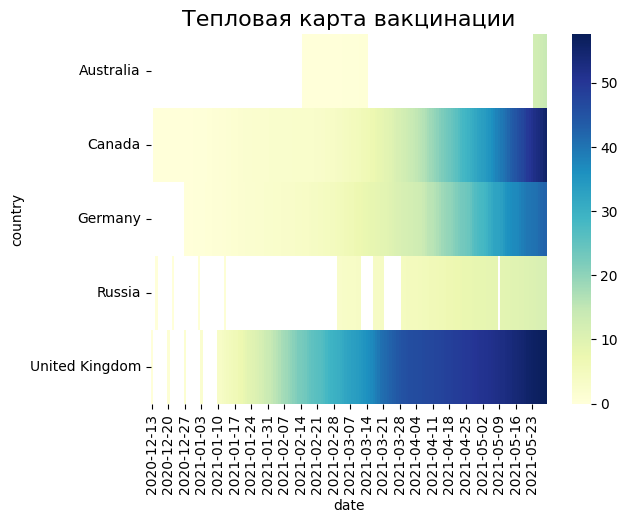

In [172]:
# тепловая карта

pivot = croped_covid_df.pivot_table(
    values='people_vaccinated_per_hundred',
    columns='date',
    index='country',
)
pivot.columns = pivot.columns.astype('string')

heatmap = sns.heatmap(data=pivot, cmap='YlGnBu') # cmap - цветовая гамма
heatmap.set_title('Тепловая карта вакцинации', fontsize=16);

# Plotly